Importing the required libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [2]:
#Importing and Reading the csv file
k=pd.read_csv('C:\\Users\\Hp\\Downloads\\day.csv')
k.head(3)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   

    cnt  
0   985  
1   801  
2  1349

In [3]:
#Understanding the dataset
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
k.shape

(730, 16)

In [5]:
#Understanding the numerical columns
k.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

Data cleansing:

In [6]:
k['dteday']=pd.to_datetime(k['dteday'])

In [8]:
#Converting some of the numerical columns to categorial based on its description

k[['season']]=k[['season']].apply(lambda x: x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
k[['weathersit']]=k[['weathersit']].apply(lambda x: x.map({1:'clear',2:'mist',3:'lightsnow'}))
k[['weekday']]=k[['weekday']].apply(lambda x: x.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}))
k[['mnth']]=k[['mnth']].apply(lambda x: x.map({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'sep',10:'oct',11:'nov',12:'dec'}))


As the dataset provided doesnt have any significant errors to correct,Proceeding towards Univariate,BI-variate,multi-variate analysis:

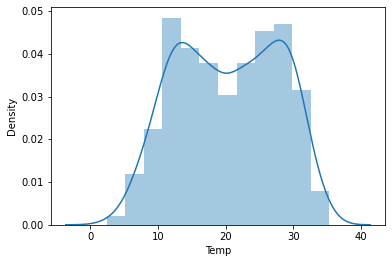

In [19]:
#Performing Univariate analysis
sns.distplot(x=k['temp'])
plt.xlabel('Temp')
plt.show()

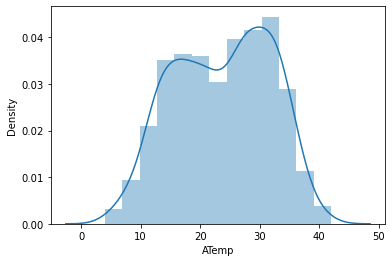

In [21]:
sns.distplot(x=k['atemp'])
plt.xlabel('ATemp')
plt.show()

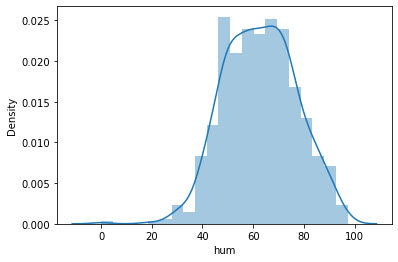

In [24]:
sns.distplot(x=k['hum'])
plt.xlabel('hum')
plt.show()

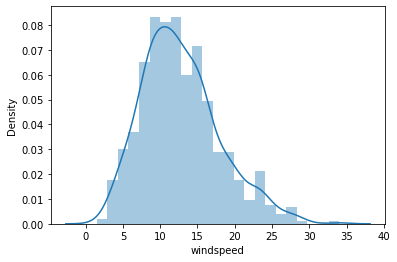

In [25]:
sns.distplot(x=k['windspeed'])
plt.xlabel('windspeed')
plt.show()

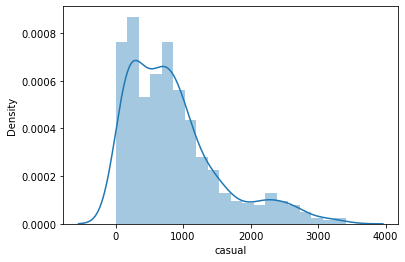

In [26]:
sns.distplot(x=k['casual'])
plt.xlabel('casual')
plt.show()

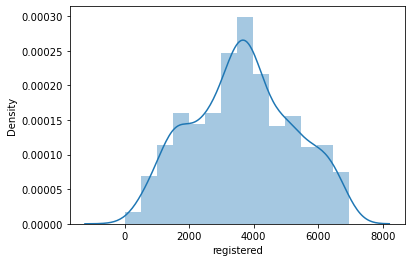

In [27]:
sns.distplot(x=k['registered'])
plt.xlabel('registered')
plt.show()

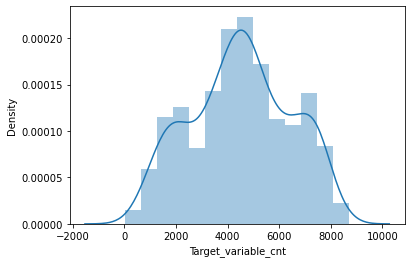

In [28]:
sns.distplot(x=k['cnt'])
plt.xlabel('Target_variable_cnt')
plt.show()

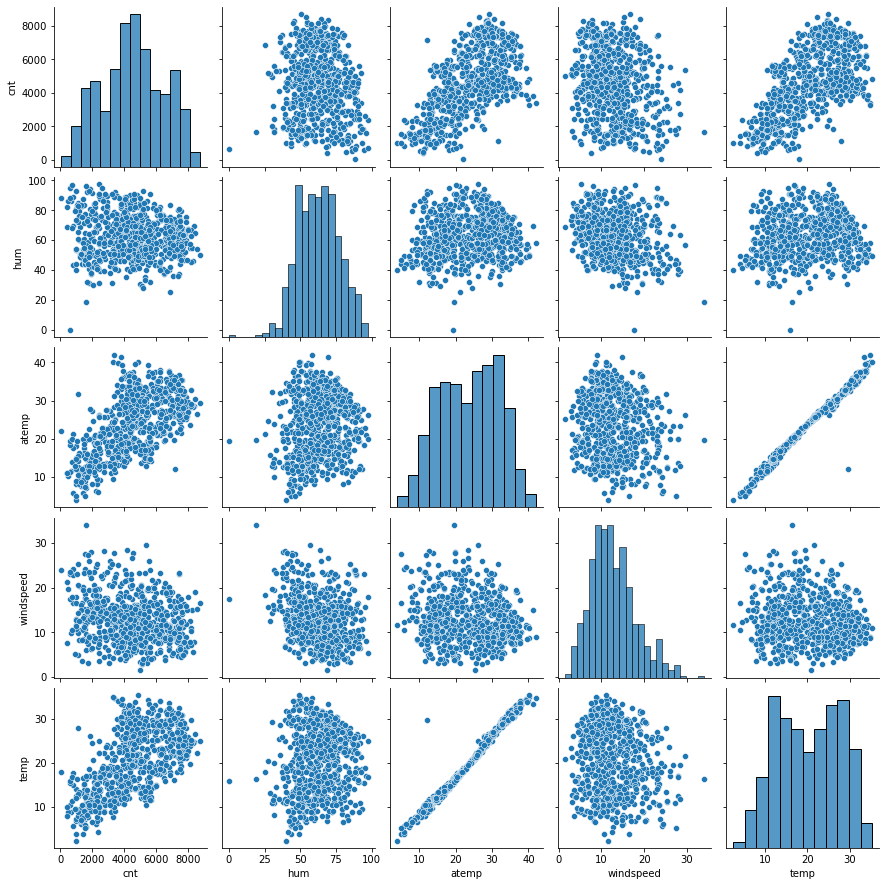

In [29]:
#Performing bi-variate analysis:
#Numerical columns
numvar=['cnt','hum','atemp','windspeed','temp']
sns.pairplot(k[numvar])
plt.show()

As we can see that the temp,hum variable has some sort of linear relationship with 'cnt'. also we can that temp and atemp have linear relation, we can eliminate any one variable. 

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

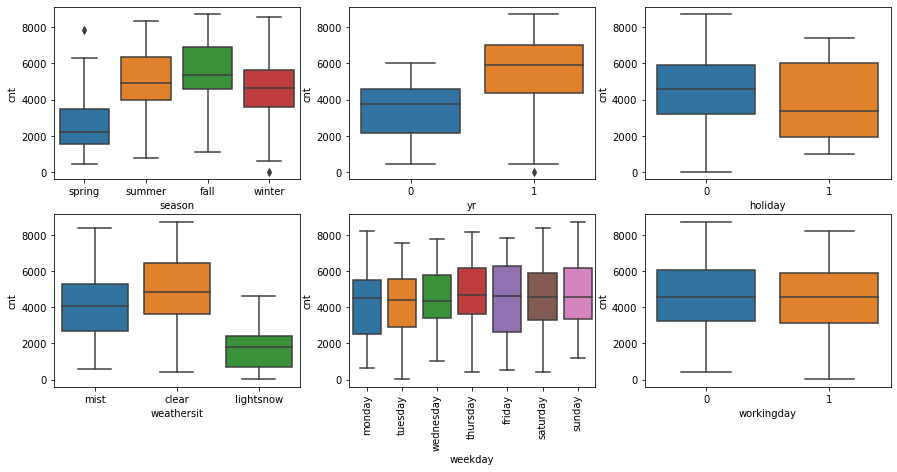

In [30]:
#Categorical Columns

plt.figure(figsize=[15,7])
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=k)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=k)

plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=k)


plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y='cnt',data=k)

plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=k)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.boxplot(x='workingday',y='cnt',data=k)


Here we can observe that cnt is high in fall season. The cnt is high in 2019 when compared to 2018.The demand is high when the weather is clear.

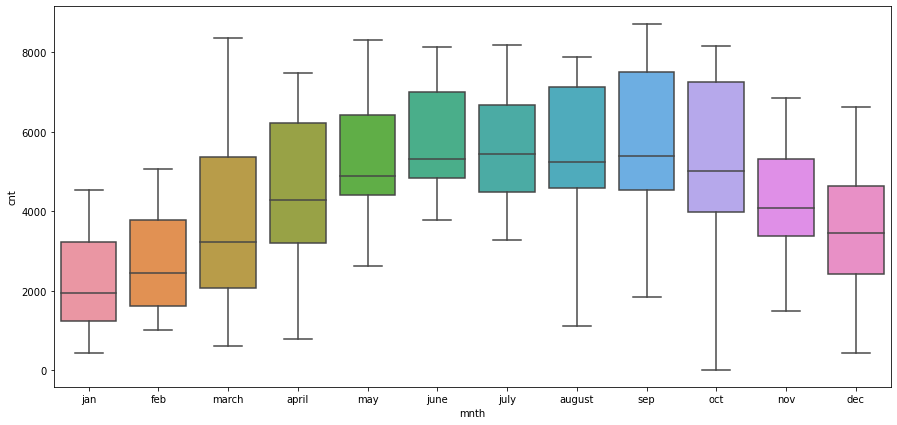

In [31]:
plt.figure(figsize=[15,7])
sns.boxplot(x='mnth',y='cnt',data=k)
plt.show()

The cnt is high in the month of sep,june while the cnt is low in jan,feb.The cnt is low at the start of the year and increases during the middle of the year and decreases at the end of the year.

In [33]:
cor=k[['hum','atemp','temp','windspeed','casual','registered','cnt']].corr()
cor

hum     atemp      temp  windspeed    casual  registered  \
hum         1.000000  0.141512  0.128565  -0.248506 -0.075211   -0.089212   
atemp       0.141512  1.000000  0.991696  -0.183876  0.543362    0.543678   
temp        0.128565  0.991696  1.000000  -0.158186  0.542731    0.539436   
windspeed  -0.248506 -0.183876 -0.158186   1.000000 -0.167995   -0.217914   
casual     -0.075211  0.543362  0.542731  -0.167995  1.000000    0.394137   
registered -0.089212  0.543678  0.539436  -0.217914  0.394137    1.000000   
cnt        -0.098543  0.630685  0.627044  -0.235132  0.672123    0.945411   

                 cnt  
hum        -0.098543  
atemp       0.630685  
temp        0.627044  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000

<AxesSubplot:>

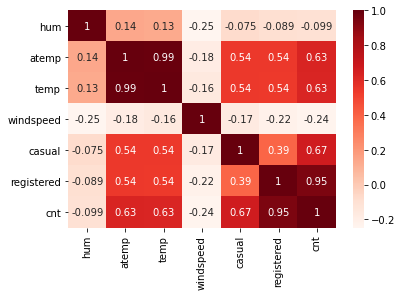

In [36]:
sns.heatmap(cor,annot=True,cmap='Reds')

As we can observe that variables temp,atemp,windspeed,casual,registered have a significant amount of correlation with cnt

In [37]:
#Performing one-hot-encoding for necessary columns:

d_w=pd.get_dummies(k['weathersit'],drop_first=True)
d_s=pd.get_dummies(k['season'],drop_first=True)
d_m=pd.get_dummies(k['mnth'],drop_first=True)
d_we=pd.get_dummies(k['weekday'],drop_first=True)
k=pd.concat([k,d_m,d_we,d_w,d_s],axis=1)

In [38]:
#Dropping the irrelavant columns:
k=k.drop(['season','mnth','weekday','weathersit'],axis=1)
k=k.drop(['casual','registered','dteday','atemp','instant'],axis=1)

In [39]:
k.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'august', 'dec', 'feb', 'jan', 'july', 'june', 'march', 'may', 'nov',
       'oct', 'sep', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'lightsnow', 'mist', 'spring', 'summer', 'winter'],
      dtype='object')

In [40]:
#Performing the split:
df_train,df_test=train_test_split(k,train_size=0.7,random_state=100)

In [41]:
#Scaling the numerical variables for train dataset
nv=['temp','hum','cnt','windspeed']

scaler=MinMaxScaler()

df_train[nv]=scaler.fit_transform(df_train[nv])

In [42]:
#Extractin the dependant and independant variables for train dataset
y_train=df_train.pop('cnt')
x_train=df_train


In [44]:
#Identifying necessary independent variables using RFE
lir=LinearRegression()
rfe=RFE(lir,25)
rfe=rfe.fit(x_train,y_train)

In [45]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('august', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', True, 1),
 ('march', False, 4),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sep', True, 1),
 ('monday', True, 1),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 3),
 ('tuesday', True, 1),
 ('wednesday', True, 1),
 ('lightsnow', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [47]:
#Identifying the columns that are derived from RFE
cols2=x_train.columns[rfe.support_]
cols2

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'august',
       'dec', 'feb', 'jan', 'july', 'june', 'may', 'nov', 'sep', 'monday',
       'saturday', 'sunday', 'tuesday', 'wednesday', 'lightsnow', 'mist',
       'spring', 'summer', 'winter'],
      dtype='object')

In [48]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [49]:
#User-defined function for building the model and vif
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [50]:
x_2_t=build_model(x_train[cols2],y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.27e-181
Time:                        19:11:54   Log-Likelihood:                 522.93
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3953      0.083      4.785      0.0

In [51]:
print(checkVIF(x_2_t))

      Features     VIF
0        const  438.55
3   workingday   66.26
18      sunday   38.42
17    saturday   36.66
23      spring    9.23
25      winter    7.12
4         temp    6.90
2      holiday    6.80
24      summer    6.79
7       august    4.82
11        july    4.41
15         sep    2.95
10         jan    2.50
12        june    2.38
5          hum    2.02
13         may    1.92
9          feb    1.91
14         nov    1.88
8          dec    1.71
22        mist    1.60
20   wednesday    1.34
19     tuesday    1.33
16      monday    1.32
21   lightsnow    1.28
6    windspeed    1.24
1           yr    1.06


Dropping the variable 'sunday' because of its high p-value.

In [52]:
x_2_t=x_2_t.drop(['sunday'],axis=1)

In [53]:
#generating the model again
x_3_t=build_model(x_2_t,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.5
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.52e-182
Time:                        19:13:31   Log-Likelihood:                 522.65
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     485   BIC:                            -889.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3431      0.041      8.414      0.0

In [54]:
print(checkVIF(x_3_t))

      Features     VIF
0        const  106.96
22      spring    9.23
24      winter    7.12
4         temp    6.89
23      summer    6.79
7       august    4.81
11        july    4.40
15         sep    2.95
10         jan    2.50
12        june    2.37
3   workingday    2.24
5          hum    2.02
13         may    1.92
9          feb    1.91
14         nov    1.86
8          dec    1.71
17    saturday    1.69
21        mist    1.60
16      monday    1.32
18     tuesday    1.32
19   wednesday    1.32
2      holiday    1.31
20   lightsnow    1.28
6    windspeed    1.24
1           yr    1.05


Dropping variable 'june' due to its high p-value.

In [55]:
x_3_t=x_3_t.drop(['june'],axis=1)

In [56]:
x_4_t=build_model(x_3_t,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.42e-183
Time:                        19:14:56   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     486   BIC:                            -895.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3436      0.041      8.442      0.0

In [57]:
print(checkVIF(x_4_t))

      Features     VIF
0        const  106.75
21      spring    8.54
22      summer    6.59
23      winter    6.27
4         temp    4.93
7       august    3.17
11        july    2.81
10         jan    2.38
3   workingday    2.24
14         sep    2.22
5          hum    1.98
9          feb    1.87
13         nov    1.85
16    saturday    1.69
8          dec    1.67
20        mist    1.59
12         may    1.51
18   wednesday    1.32
15      monday    1.31
17     tuesday    1.31
2      holiday    1.30
19   lightsnow    1.28
6    windspeed    1.23
1           yr    1.04


Dropping variable 'saturday' due to its high p-value.

In [58]:
x_4_t=x_4_t.drop(['saturday'],axis=1)

In [59]:
x_5_t=build_model(x_4_t,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.41e-184
Time:                        19:15:57   Log-Likelihood:                 522.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     487   BIC:                            -901.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3403      0.040      8.486      0.0

In [60]:
print(checkVIF(x_5_t))

      Features     VIF
0        const  103.80
20      spring    8.53
21      summer    6.59
22      winter    6.26
4         temp    4.92
7       august    3.17
11        july    2.81
10         jan    2.38
14         sep    2.22
5          hum    1.98
9          feb    1.87
13         nov    1.85
8          dec    1.67
19        mist    1.59
12         may    1.51
3   workingday    1.51
17   wednesday    1.32
15      monday    1.31
16     tuesday    1.31
18   lightsnow    1.28
2      holiday    1.24
6    windspeed    1.23
1           yr    1.04


Dropping 'workingday' due to its high p-value

In [61]:
x_5_t=x_5_t.drop(['workingday'],axis=1)

In [62]:
x_6_t=build_model(x_5_t,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.41e-185
Time:                        19:17:11   Log-Likelihood:                 522.33
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3374      0.040      8.492      0.0

As the VIF values in the previous iteration are under 10, VIf values for the rest of the iteration is not performed.Dropping variable 'august'due to its high p-value.

In [63]:
x_6_t=x_6_t.drop(['august'],axis=1)

In [64]:
x_7_t=build_model(x_6_t,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.66e-186
Time:                        19:19:18   Log-Likelihood:                 521.98
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3483      0.037      9.299      0.0

Dropping column 'wednesday' due to its high p-value.

In [65]:
x_7_t=x_7_t.drop(['wednesday'],axis=1)

In [66]:
x_8_t=build_model(x_7_t,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          2.45e-187
Time:                        19:20:14   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3449      0.037      9.238      0.0

In [67]:
#Dropping varibale 'may' due to its high p-value and further iterating:
x_8_t=x_8_t.drop(['may'],axis=1)
x_9_t=build_model(x_8_t,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          3.77e-188
Time:                        19:21:17   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3360      0.037      9.195      0.0

In [69]:
#Dropping column 'feb' due its high p-value and further iterating for better R2_score

x_9_t=x_9_t.drop(['feb'],axis=1)
x_10_t=build_model(x_9_t,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.21e-188
Time:                        19:22:35   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -926.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3239      0.036      9.021      0.0

In [70]:
print(checkVIF(x_10_t))

     Features    VIF
0       const  82.99
15     spring   5.28
3        temp   4.43
17     winter   3.84
16     summer   2.77
4         hum   1.94
9         nov   1.77
7         jan   1.68
14       mist   1.57
6         dec   1.50
8        july   1.50
10        sep   1.34
13  lightsnow   1.27
5   windspeed   1.22
12    tuesday   1.06
11     monday   1.05
1          yr   1.04
2     holiday   1.04


Now, all the variables are significant and the vif values are lessthan 10.Building the model with this dataset.

In [71]:
#Building the model using OLM from statsmodels libarary:
lm_mod=sm.OLS(y_train,x_10_t).fit()

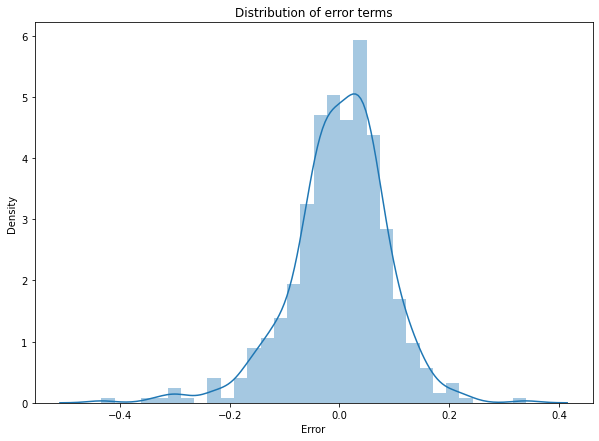

In [79]:
#Performing residual analysis to validate assumptions:
y_train_pred=lm_mod.predict(x_10_t)

res=y_train-y_train_pred
plt.figure(figsize=[10,7])
sns.distplot(res)
plt.xlabel('Error')
plt.title('Distribution of error terms')
plt.show()

-As we can see that the error terms are normally distributed with mean 0 which perfectly validates our assumptions.

In [80]:
#Performing predictions on test dataset
#Dropping the necessary columns and scaling 
df_test[nv]=scaler.transform(df_test[nv])
y_test=df_test.pop('cnt')
x_test=df_test
xt_t=x_test[cols2]
xt_t2=xt_t.drop(['sunday','saturday','wednesday','feb','june','workingday','may','august'],axis=1)

In [81]:
#Preparing the dataset for prediction
xt_t_sm1=sm.add_constant(xt_t2)
y_test_pred=lm_mod.predict(xt_t_sm1)

In [82]:
#R2_score value for test dataset and evaluation of the model:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8259605926429405

As the difference between R2_score values of train and test data sets is low, we can say that the model built is good.

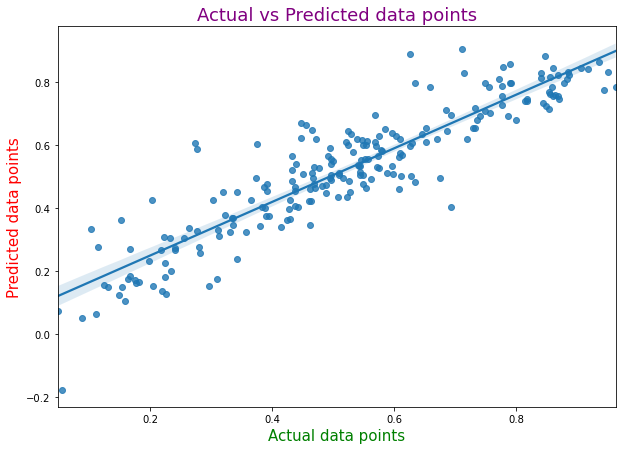

In [97]:
#Plotting y_pred  and y_test to visualize the spread:
plt.figure(figsize=[10,7])
c_plot=sns.regplot(x=y_test,y=y_test_pred)
plt.xlabel("Actual data points",fontdict={'fontsize':15,'color':'green'})
plt.ylabel('Predicted data points',fontdict={'fontsize':15,'color':'Red'})
plt.title('Actual vs Predicted data points',fontdict={'fontsize':18,'color':'purple'})
plt.show()

So the final multiple linear regression can be written as
 y(‘cnt’)= 0.32+0.23(‘yr’)-0.09(‘holiday’)+0.47(‘temp’)-0.155(‘hum’)-0.18(‘windspeed’)-0.036(‘dec’)
               -0.0436(‘jan’)-0.051(‘july’)-0.04(‘nov’)+0.075(‘sep’)-0.025(‘monday’)-0.028(‘Tuesday’) 
               -0.25(‘lightsnow’)-0.056(‘mist’)-0.06(‘spring’)+0.04(‘summer’)+0.10(‘winter’)
